# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [9]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Assumptions
- Train is delayed if delay is more than 5 Minutes
- Train data consists only of train departures where planned and changeddeparture time is available
- Map of weather data to train station with name because there is (currently) no geo data available from train staions
( Idea: Geographical data analysis https://techlabsdus.medium.com/analysis-of-deutsche-bahn-ag-long-distance-train-traffic-delays-b183aacad9a2
To avoid further work with different API, all longitudes and latitudes for the main train stations were taken from the txt.files from GTFS.de (4.c.) by converting to csv-files and data frames. For a bigger project API’s should be taken into consideration.
)
- Restriction to main stations in germany 


## Load data

In [10]:
import pandas as pd

weather_stations= pd.read_sql_table('weather_stations','sqlite:///project/data/amse.sqlite')
weather_stations


,Unnamed: 0,id,name,country,region,identifiers,location,timezone,inventory
0,1227,10004,{'en': 'UFS TW Ems'},DE,HH,"{'national': '01228', 'wmo': '10004', 'icao': ...","{'latitude': 54.1667, 'longitude': 6.35, 'elev...",Europe/Berlin,"{'model': {'start': '2018-01-28', 'end': '2023..."
1,1228,10007,{'en': 'UFS Deutsche Bucht.'},DE,HH,"{'national': '00954', 'wmo': '10007', 'icao': ...","{'latitude': 54.1833, 'longitude': 7.4333, 'el...",Europe/Berlin,"{'model': {'start': '2018-01-28', 'end': '2023..."
2,1229,10008,{'en': 'Nordseeboje 2'},DE,HH,"{'national': '13904', 'wmo': '10008', 'icao': ...","{'latitude': 55.0, 'longitude': 6.3333, 'eleva...",Europe/Berlin,"{'model': {'start': None, 'end': None}, 'hourl..."
3,1230,10015,{'en': 'Helgoland'},DE,SH,"{'national': '02115', 'wmo': '10015', 'icao': ...","{'latitude': 54.1833, 'longitude': 7.9, 'eleva...",Europe/Berlin,"{'model': {'start': '2018-01-28', 'end': '2023..."
4,1231,10018,{'en': 'Westerland / Sylt'},DE,SH,"{'national': None, 'wmo': '10018', 'icao': 'ED...","{'latitude': 54.9167, 'longitude': 8.35, 'elev...",Europe/Berlin,"{'model': {'start': '2018-01-28', 'end': '2023..."
...,...,...,...,...,...,...,...,...,...
1179,15583,XXIO0,"{'en': 'Bretten, Kreis Karlsruhe'}",DE,BW,"{'national': '07490', 'wmo': None, 'icao': None}","{'latitude': 49.0334, 'longitude': 8.7121, 'el...",Europe/Berlin,"{'model': {'start': '2023-05-13', 'end': '2023..."
1180,15589,Y4O2A,{'en': 'Backnang/murr'},DE,BW,"{'national': '07380', 'wmo': None, 'icao': None}","{'latitude': 48.9353, 'longitude': 9.4009, 'el...",Europe/Berlin,"{'model': {'start': '2023-05-13', 'end': '2023..."
1181,15594,YA9TW,"{'en': 'Boll, Bad (kläranl.)'}",DE,BW,"{'national': '05985', 'wmo': None, 'icao': None}","{'latitude': 48.652, 'longitude': 9.6232, 'ele...",Europe/Berlin,"{'model': {'start': '2023-05-14', 'end': '2023..."
1182,15618,YJQ5W,{'en': 'Enzklösterle'},DE,BW,"{'national': '05840', 'wmo': None, 'icao': None}","{'latitude': 48.6671, 'longitude': 8.47, 'elev...",Europe/Berlin,"{'model': {'start': '2023-05-14', 'end': '2023..."


In [11]:
weather= pd.read_sql_table('weather','sqlite:///project/data/amse.sqlite')
weather

,date,hour,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,station
0,2023-01-02,0,13.3,8.4,72.0,NaN,NaN,196.0,27.8,42.6,1012.4,NaN,4.0,10501
1,2023-01-02,1,13.3,8.6,73.0,NaN,NaN,200.0,27.8,44.5,1012.5,NaN,4.0,10501
2,2023-01-02,2,13.2,8.7,74.0,NaN,NaN,200.0,29.6,44.5,1012.5,NaN,4.0,10501
3,2023-01-02,3,13.0,8.9,76.0,NaN,NaN,202.0,29.6,46.3,1012.5,NaN,7.0,10501
4,2023-01-02,4,12.6,8.9,78.0,NaN,NaN,205.0,25.9,44.5,1012.4,NaN,7.0,10501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768305,2023-06-06,14,21.1,8.7,45.0,NaN,NaN,19.0,13.0,27.8,1016.1,NaN,2.0,10714
768306,2023-06-06,15,21.1,8.7,45.0,NaN,NaN,22.0,13.0,27.8,1015.9,NaN,2.0,10714
768307,2023-06-06,16,20.8,8.8,46.0,NaN,NaN,17.0,13.0,27.8,1015.8,NaN,2.0,10714
768308,2023-06-06,17,20.5,11.4,56.0,NaN,NaN,291.0,13.0,25.9,1015.5,NaN,3.0,10714


In [12]:
train_stations= pd.read_sql_table('train_stations','sqlite:///project/data/amse.sqlite')
train_stations

,meta,name,eva,ds100,db,creationts,updatets
0,None,Aachen Hbf,8000001,KA,1,23-06-10 10:47:35.561,None
1,None,Aalen Hbf,8000002,TA,1,23-06-10 10:47:35.561,None
2,None,Arnstadt Hbf,8010007,UA,1,23-06-10 10:47:35.980,None
3,None,Aschaffenburg Hbf,8000010,NAH,1,23-06-10 10:47:35.562,None
4,None,Augsburg Hbf,8000013,MA,1,23-06-10 10:47:35.562,None
...,...,...,...,...,...,...,...
193,8089299,Würzburg Hbf,8000260,NWH,1,23-06-10 10:47:35.841,None
194,8000260,Würzburg Hbf (Busbahnhof),8089299,NWH H,1,23-06-10 10:47:36.105,None
195,None,Zweibrücken Hbf,8006680,SZW,1,23-06-10 10:47:36.090,None
196,None,Zwickau(Sachs)Hbf,8010397,DZW,1,23-06-10 10:47:35.722,None


In [61]:
timetable= pd.read_sql_table('timetables06-12-22','sqlite:///project/data/amse.sqlite')
#timetable = timetable.dropna(subset=['pt'])
timetable = timetable.dropna()

timetable = timetable.drop_duplicates()
timetable

,eva,ct,pt
62,8000001,"12.06.2023, 18:02","12.06.2023, 17:22"
68,8000001,"12.06.2023, 18:04","12.06.2023, 17:23"
115,8000002,"12.06.2023, 21:41","12.06.2023, 20:58"
234,8000010,"13.06.2023, 00:03","12.06.2023, 21:23"
235,8000010,"12.06.2023, 23:54","12.06.2023, 23:24"
...,...,...,...
19661,8000260,"12.06.2023, 13:25","12.06.2023, 13:25"
19681,8089299,"12.06.2023, 21:47","12.06.2023, 16:29"
19706,8010397,"12.06.2023, 22:35","12.06.2023, 21:32"
19823,8004623,"12.06.2023, 17:03","12.06.2023, 16:18"


In [66]:
timetable['pt'].dtype

dtype('<M8[ns]')

In [65]:
from datetime import timedelta
#timetable['ct'] = pd.to_datetime(timetable['ct'], format='%d.%m.%Y, %H:%M')
timetable['pt'] = pd.to_datetime(timetable['pt'], format='%d.%m.%Y, %H:%M')
timetable

,eva,ct,pt
62,8000001,"12.06.2023, 18:02",2023-12-06 17:22:00
68,8000001,"12.06.2023, 18:04",2023-12-06 17:23:00
115,8000002,"12.06.2023, 21:41",2023-12-06 20:58:00
234,8000010,"13.06.2023, 00:03",2023-12-06 21:23:00
235,8000010,"12.06.2023, 23:54",2023-12-06 23:24:00
...,...,...,...
19661,8000260,"12.06.2023, 13:25",2023-12-06 13:25:00
19681,8089299,"12.06.2023, 21:47",2023-12-06 16:29:00
19706,8010397,"12.06.2023, 22:35",2023-12-06 21:32:00
19823,8004623,"12.06.2023, 17:03",2023-12-06 16:18:00


In [67]:
#from datetime import timedelta
#timetable['ct'] = pd.to_datetime(timetable['ct'])
#timetable['pt'] = pd.to_datetime(timetable['pt'])


timetable['delay']=(timetable['ct']-timetable['pt'])/timedelta(minutes=1)

timetable
timetable['has_delay']=timetable['delay'].apply(lambda x: 1 if x > 5 else 0)
timetable.head(100)

TypeError: cannot subtract DatetimeArray from ndarray

In [32]:
result = timetable.groupby('eva')['pt'].count()
result


eva
8000001     2
8000002     1
8000010     6
8000013    11
8000017     1
           ..
8100013     1
8100014     2
8100099     2
8100108     4
8103000     1
Name: pt, Length: 109, dtype: int64

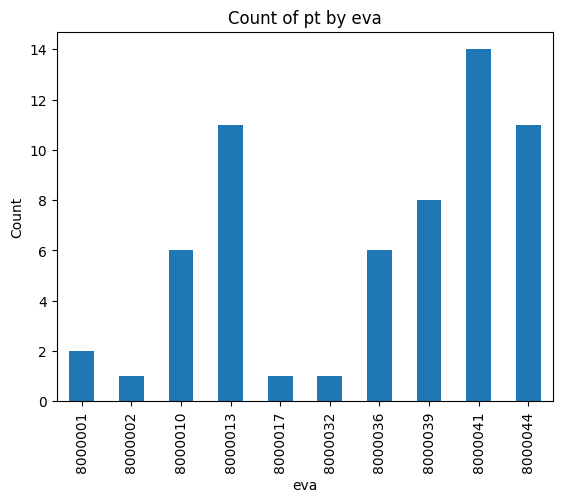

In [35]:
#%pip install matplotlib
import matplotlib.pyplot as plt
result[:10].plot(kind='bar')

# Set plot title and axis labels
plt.title('Count of pt by eva')
plt.xlabel('eva')
plt.ylabel('Count')

# Display the plot
plt.show()

### Look at the first rows

In [14]:
timetables.head(10)

,eva,ct,pt
0,8000001,"31.05.2023, 17:45",None
1,8000001,"31.05.2023, 20:21",None
2,8000001,"31.05.2023, 18:37",None
3,8000001,"31.05.2023, 18:37",None
4,8000001,"31.05.2023, 19:23",None
5,8000001,"31.05.2023, 18:25",None
6,8000001,"31.05.2023, 14:51",None
7,8000001,"31.05.2023, 15:56",None
8,8000001,"31.05.2023, 18:05",None
9,8000001,"31.05.2023, 18:04",None


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [15]:
#timetables=timetables.dropna(timetables['pt'])
timetables = timetables[timetables['pt'].notna()]
timetables

,eva,ct,pt
349,8000010,"31.05.2023, 15:04","31.05.2023, 14:33"
461,8000013,"31.05.2023, 18:04","31.05.2023, 17:22"
462,8000013,"31.05.2023, 20:57","31.05.2023, 20:55"
523,8000013,"31.05.2023, 16:20","31.05.2023, 15:41"
532,8000013,"31.05.2023, 14:25","31.05.2023, 14:24"
...,...,...,...
25360,8010397,"31.05.2023, 14:39","31.05.2023, 13:32"
25382,8010397,"31.05.2023, 13:08","31.05.2023, 12:32"
25396,8010397,"31.05.2023, 12:23","31.05.2023, 11:32"
25398,8010397,"31.05.2023, 12:07","31.05.2023, 09:32"


In [16]:
timetables['ct'].isna().sum()

137

In [44]:
timetables['ct'] = pd.to_datetime(timetables['ct'])
timetables['pt'] = pd.to_datetime(timetables['pt'])

timetables['delay']=(timetables['ct']-timetables['pt']) / timedelta(minutes=1)
timetables

,eva,ct,pt,delay
0,8000001,2023-12-06 23:02:00,NaT,NaN
1,8000001,2023-06-13 00:02:00,NaT,NaN
2,8000001,2023-12-06 22:37:00,NaT,NaN
3,8000001,2023-12-06 22:37:00,NaT,NaN
4,8000001,2023-12-06 22:32:00,NaT,NaN
...,...,...,...,...
19823,8004623,2023-12-06 17:03:00,2023-12-06 16:18:00,45.0
19824,8004623,2023-12-06 17:08:00,2023-12-06 16:37:00,31.0
19825,8004623,2023-12-06 15:39:00,NaT,NaN
19826,8004623,2023-12-06 15:09:00,NaT,NaN


In [18]:
match_table= pd.read_sql_table('match_table','sqlite:///project/data/amse.sqlite')
match_table

,eva,name_x,common,id,name_y,match
0,8000001,Aachen Hbf,Aachen,10501,{'en': 'Aachen'},1
1,8000001,Aachen Hbf,Aachen,10503,{'en': 'Aachen / Merzbruck'},1
2,8000013,Augsburg Hbf,Augsburg,10852,{'en': 'Augsburg'},1
3,8000028,Bayreuth Hbf,Bayreuth,10677,{'en': 'Bayreuth'},1
4,8000885,Berchtesgaden Hbf,Berchtesgaden,D6190,{'en': 'Berchtesgaden'},1
...,...,...,...,...,...,...
227,8000379,Wittlich Hbf,Wittlich,D5635,{'en': 'Wittlich'},1
228,8006552,Wolfsburg Hbf,Wolfsburg,D5676,{'en': 'Wolfsburg (Südwest)'},1
229,8000257,Worms Hbf,Worms,EDFV0,{'en': 'Worms / Nonnenhof'},1
230,8000266,Wuppertal Hbf,Wuppertal,D5717,{'en': 'Wuppertal-Buchenhofen'},1


In [19]:
timetables.info()

#df['Status'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 349 to 25416
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   eva     955 non-null    int64          
 1   ct      818 non-null    datetime64[ns] 
 2   pt      955 non-null    datetime64[ns] 
 3   delay   818 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 37.3 KB


### Plot count of delayed trains at station

### Plot avergare temp per day at station

### Plot correlation between delayed trains and temp

### Plot map of train delays frequencies in germany